In [1]:
# Sklearn 把所有机器学习的模式整合统一起来了，学会了一个模式就可以通吃其他不同类型的学习模式。

# 例如，分类器，

# Sklearn 本身就有很多数据库，可以用来练习。 以 Iris 的数据为例，这种花有四个属性，花瓣的长宽，茎的长宽，根据这些属性把花分为三类。

# 我们要用 分类器 去把四种类型的花分开。

# 通用学习模式

# 今天用 KNN classifier，就是选择几个临近点，综合它们做个平均来作为预测值。

In [1]:
#一、导入模块

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# 二、创建数据 

# 加载 iris 的数据，把属性存在 X，类别标签存在 y：

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
#观察一下数据集，X 有四个属性，y 有 0，1，2 三类：

print(iris_X[:2, :])
print(iris_y)

"""
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
 """
# 把数据集分为训练集和测试集，其中 test_size=0.3，即测试集占总数据的 30%：

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.3)
# 可以看到分开后的数据集，顺序也被打乱，这样更有利于学习模型：

print(y_train)

"""
[2 1 0 1 0 0 1 1 1 1 0 0 1 2 1 1 1 0 2 2 1 1 1 1 0 2 2 0 2 2 2 2 2 0 1 2 2
 2 2 2 2 0 1 2 2 1 1 1 0 0 1 2 0 1 0 1 0 1 2 2 0 1 2 2 2 1 1 1 1 2 2 2 1 0
 1 1 0 0 0 2 0 1 0 0 1 2 0 2 2 0 0 2 2 2 1 2 0 0 2 1 2 0 0 1 2]
 """

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 2 2 2 0 2 0 1 0 1 0 0 0 0 2 0 0 2 2 2 2 0 0 1 0 1 2 2 1 1 2 2 2 1 1 1 2
 1 0 0 1 0 2 2 2 1 1 2 2 2 1 0 2 1 1 2 0 0 0 2 1 1 0 1 1 2 1 1 0 0 0 0 1 2
 2 0 1 0 1 0 2 1 2 1 1 0 0 0 0 1 0 1 0 0 0 2 2 2 2 2 1 2 1 0 2]


'\n[2 1 0 1 0 0 1 1 1 1 0 0 1 2 1 1 1 0 2 2 1 1 1 1 0 2 2 0 2 2 2 2 2 0 1 2 2\n 2 2 2 2 0 1 2 2 1 1 1 0 0 1 2 0 1 0 1 0 1 2 2 0 1 2 2 2 1 1 1 1 2 2 2 1 0\n 1 1 0 0 0 2 0 1 0 0 1 2 0 2 2 0 0 2 2 2 1 2 0 0 2 1 2 0 0 1 2]\n '

In [4]:
# 三、建立模型－训练－预测

# 定义模块方式 KNeighborsClassifier()， 用 fit 来训练 training data，
# 这一步就完成了训练的所有步骤， 后面的 knn 就已经是训练好的模型，
# 可以直接用来 predict 测试集的数据， 对比用模型预测的值与真实的值，可以看到大概模拟出了数据，
# 但是有误差，是不会完完全全预测正确的。

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)#模型训练，将预处理好的数据（输入变量X和输出标签Y）放入已建立好的模型做训练
print(knn.predict(X_test))
print(y_test)

"""
[2 0 0 1 2 2 0 0 0 1 2 2 1 1 2 1 2 1 0 0 0 2 1 2 0 0 0 0 1 0 2 0 0 2 1 0 1
 0 0 1 0 1 2 0 1]
[2 0 0 1 2 1 0 0 0 1 2 2 1 1 2 1 2 1 0 0 0 2 1 2 0 0 0 0 1 0 2 0 0 2 1 0 1
 0 0 1 0 1 2 0 1]
 """

[2 2 1 2 0 0 0 2 1 1 2 1 2 0 0 1 2 1 2 2 0 1 0 0 2 0 1 0 2 2 0 0 1 1 1 1 1
 2 1 0 2 2 0 1 1]
[2 2 1 2 0 0 0 2 1 1 2 1 2 0 0 1 1 1 2 2 0 1 0 0 2 0 1 0 2 1 0 0 1 1 1 2 1
 2 1 0 2 2 0 1 1]


'\n[2 0 0 1 2 2 0 0 0 1 2 2 1 1 2 1 2 1 0 0 0 2 1 2 0 0 0 0 1 0 2 0 0 2 1 0 1\n 0 0 1 0 1 2 0 1]\n[2 0 0 1 2 1 0 0 0 1 2 2 1 1 2 1 2 1 0 0 0 2 1 2 0 0 0 0 1 0 2 0 0 2 1 0 1\n 0 0 1 0 1 2 0 1]\n '

In [5]:
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

#sklearn 自带的强大数据库

In [6]:
# 导入模块 
# 导入 datasets 包，本文以 Linear Regression 为例。

from __future__ import print_function
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
# 导入数据－训练模型 
# 用 datasets.load_boston() 的形式加载数据，并给 X 和 y 赋值，这种形式在 Sklearn 中都是高度统一的。

loaded_data = datasets.load_boston()
data_X = loaded_data.data#在dataSet之中没有分训练集和测试集，需要通过train_test_split方法分割一部分数据作为测试集
data_y = loaded_data.target

# 定义模型。
# 可以直接用默认值去建立 model，默认值也不错，也可以自己改变参数使模型更好。 然后用 training data 去训练模型。

model = LinearRegression()
model.fit(data_X, data_y)

# 再打印出预测值，这里用 X 的前 4 个来预测，同时打印真实值，作为对比，可以看到是有些误差的。

print(model.predict(data_X[:4, :]))
print(data_y[:4])

# “”“
# [ 30.00821269  25.0298606   30.5702317   28.60814055]
# [ 24.   21.6  34.7  33.4]
# ”“”
# 为了提高准确度，可以通过尝试不同的 model，不同的参数，不同的预处理等方法，入门的话可以直接用默认值。

[30.00384338 25.02556238 30.56759672 28.60703649]
[24.  21.6 34.7 33.4]


D:\Anaconda\envs\RLwork\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

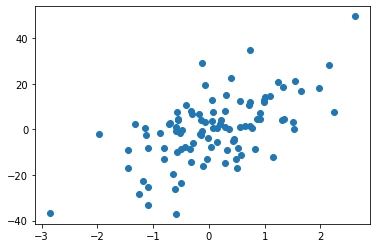

In [8]:
# 创建虚拟数据－可视化 ¶
# 下面是创造数据的例子。

# 用函数来建立 100 个 sample，有一个 feature，和一个 target，这样比较方便可视化。

X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=10)
# 用 scatter 的形式来输出结果。

plt.scatter(X, y)
plt.show()

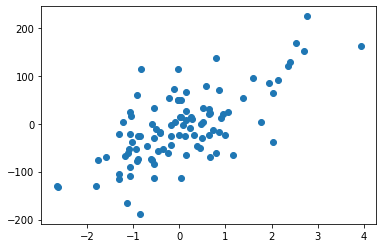

In [9]:
# 可以看到用函数生成的 Linear Regression 用的数据。

# noise 越大的话，点就会越来越离散，例如 noise 由 10 变为 50.

X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=50)
plt.scatter(X, y)
plt.show()